<a href="https://colab.research.google.com/github/smbsues/Capstone/blob/main/Capstone_Part_2_(CM%2C_ESM%2C_ROUGE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rouge
!pip install rouge-score

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/Capstone/en-de-trans_sentiments.tsv', sep="\t")

new_df.groupby(['sent_gold', 'sent_en']).count().reset_index()

,sent_gold,sent_en,de_gold,en,de_trans,sent_trans
0,0.0,0.0,482,482,482,482
1,0.0,1.0,820,820,820,820
2,0.0,2.0,136,136,136,136
3,1.0,0.0,1288,1288,1288,1288
4,1.0,1.0,4890,4890,4890,4890
5,1.0,2.0,561,561,561,561
6,2.0,0.0,346,346,346,346
7,2.0,1.0,1143,1143,1143,1143
8,2.0,2.0,333,333,333,333


In [ ]:
new_df.columns

#len(new_df)

#new_df.head

new_df

,de_gold,en,de_trans,sent_gold,sent_en,sent_trans
0,"Na schön, ich denke, dieses Mal wird es gehen.","Well, I suppose it' il be alright.","Nun, ich nehme an, es ist in Ordnung.",2.0,1.0,1.0
1,Was mache ich hier eigentlich?,What the hell am I doing around here?,Was zum Teufel mache ich hier?,1.0,0.0,1.0
2,Die kommen hier herein und...,They walk in here and...,Sie gehen hier rein und...,1.0,1.0,1.0
3,Mal sehen.,Let' s see.,Mal sehen.,1.0,1.0,1.0
4,"Ich hoffe, ich habe...",I hope I got...,"Ich hoffe, ich habe...",1.0,1.0,1.0
...,...,...,...,...,...,...
9995,Das wär' s.,That' s it.,Das war's.,1.0,1.0,1.0
9996,Ihre Bestellung ist fertig.,Your order' s ready.,Deine Bestellung ist fertig.,1.0,1.0,1.0
9997,Bitte vorfahren.,Pull forward.,Zieht nach vorne.,1.0,1.0,1.0
9998,- Das ging flott.,That' s pretty quick.,Das geht ziemlich schnell.,0.0,2.0,1.0


In [ ]:
new_df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

#new_df.fillna('')

new_df = new_df.iloc[:-1 , :]

<ipython-input-8-8b3f41b60fbd>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_gold_trans = cm_gold_trans.astype('float') / cm_gold_trans.sum(axis=1)[:, np.newaxis]


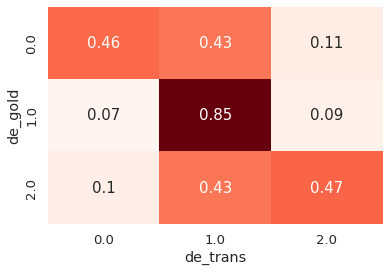


Same Count: 7220 (72.21%)
Different Count: 2779 (27.79%)


In [ ]:
#German Gold and German Translated

# cm_gold_trans = confusion_matrix(new_df['sent_gold'], new_df['sent_trans'], labels=['positive', 'negative', 'neutral'])
# cm_gold_trans = pd.crosstab(new_df['sent_gold'], new_df['sent_trans'], rownames=['de_gold'], colnames=['de_trans'])
# sns.set(font_scale=1.2) 
# sns.heatmap(cm_gold_trans, annot=True, cbar = False, cmap = "Reds", fmt = 'g', annot_kws={"size": 15})
# plt.show()

cm_gold_trans = pd.crosstab(new_df['sent_gold'], new_df['sent_trans'], rownames=['de_gold'], colnames=['de_trans'])
cm_gold_trans = cm_gold_trans.astype('float') / cm_gold_trans.sum(axis=1)[:, np.newaxis]

sns.set(font_scale=1.2) 
sns.heatmap(round(cm_gold_trans,2), annot=True, cbar = False, cmap = "Reds", fmt = 'g', annot_kws={"size": 15})
plt.show()

total = 9999
same_gt = 659 + 5702 + 859
same_gt_per = round((same_gt/total*100),2)
diff_gt = total - same_gt
diff_gt_per = round((diff_gt/total*100),2)
print(f'')
print(f'Same Count: {same_gt} ({same_gt_per}%)')
print(f'Different Count: {diff_gt} ({diff_gt_per}%)')

<ipython-input-9-ba53259b0fab>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_en_trans = cm_en_trans.astype('float') / cm_en_trans.sum(axis=1)[:, np.newaxis]


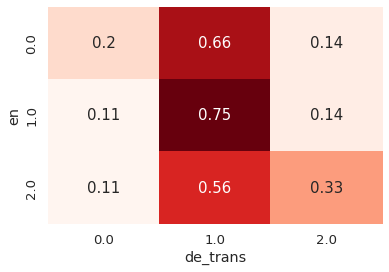


Same Count: 5895 (58.96%)
Different Count: 4104 (41.04%)


In [ ]:
#English and German Translated

cm_en_trans = pd.crosstab(new_df['sent_en'], new_df['sent_trans'], rownames=['en'], colnames=['de_trans'])
cm_en_trans = cm_en_trans.astype('float') / cm_en_trans.sum(axis=1)[:, np.newaxis]

sns.set(font_scale=1.2)
sns.heatmap(round(cm_en_trans,2), annot=True, cbar = False, cmap = "Reds", fmt = 'g', annot_kws={"size": 15})
plt.show()

total = 9999
same_et = 423 + 5127 + 345
same_et_per = round((same_et/total*100),2)
diff_et = total - same_et
diff_et_per = round((diff_et/total*100),2)
print(f'')
print(f'Same Count: {same_et} ({same_et_per}%)')
print(f'Different Count: {diff_et} ({diff_et_per}%)')

<ipython-input-10-07d02af34d0a>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_en_gold = cm_en_gold.astype('float') / cm_en_gold.sum(axis=1)[:, np.newaxis]


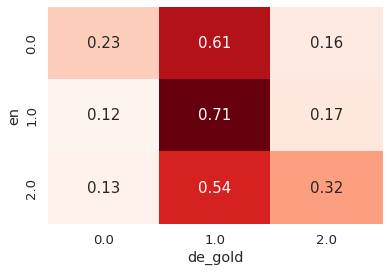


Same Count: 5705 (57.06%)
Different Count: 4294 (42.94%)


In [ ]:
#English and German Gold

cm_en_gold = pd.crosstab(new_df['sent_en'], new_df['sent_gold'], rownames=['en'], colnames=['de_gold'])
cm_en_gold = cm_en_gold.astype('float') / cm_en_gold.sum(axis=1)[:, np.newaxis]

sns.set(font_scale=1.2)
sns.heatmap(round(cm_en_gold,2), annot=True, cbar = False, cmap = "Reds", fmt = 'g', annot_kws={"size": 15})
plt.show()

total = 9999
same_eg = 482 + 4890 + 333
same_eg_per = round((same_eg/total*100),2)
diff_eg = total - same_eg
diff_eg_per = round((diff_eg/total*100),2)
print(f'')
print(f'Same Count: {same_eg} ({same_eg_per}%)')
print(f'Different Count: {diff_eg} ({diff_eg_per}%)')

In [ ]:
print(f'\033[1mGerman Gold-German Translated\033[0m')
print(f'Same: {same_gt} ({same_gt_per}%)')
print(f'Different: {diff_gt} ({diff_gt_per}%)')
print(f'')
print(f'\033[1mEnglish-German Translated\033[0m')
print(f'Same: {same_et} ({same_et_per}%)')
print(f'Different: {diff_et} ({diff_et_per}%)')
print(f'')
print(f'\033[1mEngish-German Gold\033[0m')
print(f'Same: {same_eg} ({same_eg_per}%)')
print(f'Different: {diff_eg} ({diff_eg_per}%)')

German Gold-German Translated
Same: 7220 (72.21%)
Different: 2779 (27.79%)

English-German Translated
Same: 5895 (58.96%)
Different: 4104 (41.04%)

Engish-German Gold
Same: 5705 (57.06%)
Different: 4294 (42.94%)


In [ ]:
# new_df['de_gold'] = new_df['de_gold'].str.replace('\d+', '')
# new_df['de_trans'] = new_df['de_trans'].str.replace('\d+', '')
# new_df['en'] = new_df['en'].str.replace('\d+', '')

In [ ]:
new_df['De_Sentiment_Match'] = new_df['sent_gold'] == new_df['sent_trans']

new_df['DeG_En_Sentiment_Match'] = new_df['sent_gold'] == new_df['sent_en']

new_df['DeT_En_Sentiment_Match'] = new_df['sent_en'] == new_df['sent_trans']

# new_df

In [ ]:
new_df['Exact_String'] = np.where((new_df['de_gold'] == new_df['de_trans']) & (
    new_df['de_gold'] != new_df['en']), True, False)

In [ ]:
#Counts for exact string matching

total_count = len(new_df)
correct_str_count = len(new_df[new_df.Exact_String == True])
incorrect_str_count = len(new_df[new_df.Exact_String == False])
correct_str_per = round((len(new_df[new_df.Exact_String == True])/total_count)*100,2)
incorrect_str_per = round((len(new_df[new_df.Exact_String == False])/total_count)*100,2)

print(f'\033[1mExact string matching:\033[0m')
print(f'Total correct: {correct_str_count} ({correct_str_per}%)')
print(f'Total incorrect: {incorrect_str_count} ({incorrect_str_per}%)')

Exact string matching:
Total correct: 1332 (13.32%)
Total incorrect: 8667 (86.68%)


In [ ]:
#Rouge 1 scores

scorer = rouge_scorer.RougeScorer(['rouge1'])

results_1 = {'Precision_1': [], 'Recall_1': [], 'fmeasure_1': []}

for (i, sentence) in new_df.iterrows():
    score = scorer.score(sentence['de_gold'], sentence['de_trans'])
    precision_1, recall_1, fmeasure_1 = score['rouge1']
    results_1['Precision_1'].append(precision_1)
    results_1['Recall_1'].append(recall_1)
    results_1['fmeasure_1'].append(fmeasure_1)

results_df_1 = pd.DataFrame(results_1)

# results_df

In [ ]:
#Rouge 4 scores

scorer = rouge_scorer.RougeScorer(['rouge4'])

results_4 = {'Precision_4': [], 'Recall_4': [], 'fmeasure_4': []}

for (i, sentence) in new_df.iterrows():
    score = scorer.score(sentence['de_gold'], sentence['de_trans'])
    precision4, recall4, fmeasure4 = score['rouge4']
    results_4['Precision_4'].append(precision4)
    results_4['Recall_4'].append(recall4)
    results_4['fmeasure_4'].append(fmeasure4)

results_df_4 = pd.DataFrame(results_4)

# results_df_4

In [ ]:
#Rouge L scores

scorer = rouge_scorer.RougeScorer(['rougeL'])

results_L = {'Precision_L': [], 'Recall_L': [], 'fmeasure_L': []}

for (i, sentence) in new_df.iterrows():
    score = scorer.score(sentence['de_gold'], sentence['de_trans'])
    precision_L, recall_L, fmeasure_L = score['rougeL']
    results_L['Precision_L'].append(precision_L)
    results_L['Recall_L'].append(recall_L)
    results_L['fmeasure_L'].append(fmeasure_L)

results_df_L = pd.DataFrame(results_L)

# results_df_L

In [ ]:
#Comparison of Rouge 1, 4, and L scores

results_compare = pd.concat([results_df_1, results_df_4, results_df_L], axis=1, ignore_index=False)

# results_compare

In [ ]:
# new_df.iloc[9998]

In [ ]:
new_df.to_csv('correct_evals.tsv', sep="\t")

In [ ]:
nr_df = pd.concat([new_df, results_df_1, results_df_4, results_df_L], axis=1, ignore_index=False)

# nr_df[9990:]

In [ ]:
# nr_df.dtypes

In [ ]:
#GT-GG Sentiment Match-Exact String Correlation
#The pairwise correlation here is not specified as Pearson, Spearman, or Kendall

print(f'\033[1mGT-GG Sentiment Match-Exact String Correlation\033[0m',nr_df['De_Sentiment_Match'].corr(nr_df['Exact_String']))

GT-GG Sentiment Match-Exact String Correlation 0.24321669839362667


In [ ]:
# some_var = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
#             .groupby('De_Sentiment_Match')['Exact_String'].mean())

new_df.groupby(['De_Sentiment_Match', 'Exact_String']).count().reset_index()

,De_Sentiment_Match,Exact_String,de_gold,en,de_trans,sent_gold,sent_en,sent_trans,DeG_En_Sentiment_Match,DeT_En_Sentiment_Match
0,False,False,2779,2779,2779,2779,2779,2779,2779,2779
1,True,False,5888,5888,5888,5888,5888,5888,5888,5888
2,True,True,1332,1332,1332,1332,1332,1332,1332,1332


In [ ]:
# German Gold-German Translated P/R/F averages for ROUGE 1, 4, and L

# avg_p1 = (nr_df['Precision_1'].mean())

# avg_r1 = (nr_df['Recall_1'].mean())

# avg_f1 = (nr_df['fmeasure_1'].mean())

# avg_p4 = (nr_df['Precision_4'].mean())

# avg_r4 = (nr_df['Recall_4'].mean())

# avg_f4 = (nr_df['fmeasure_4'].mean())

# avg_pL = (nr_df['Precision_L'].mean())

# avg_rL = (nr_df['Recall_L'].mean())

# avg_fL = (nr_df['fmeasure_L'].mean())

# print(f'\033[1mPrecision_1\033[0m \n{avg_p1}')
# print(f'')
# print(f'\033[1mRecall_1\033[0m \n{avg_r1}')
# print(f'')
# print(f'\033[1mFmeasure_1\033[0m \n{avg_f1}')
# print(f'')
# print(f'\033[1mPrecision_4\033[0m \n{avg_p4}')
# print(f'')
# print(f'\033[1mRecall_4\033[0m \n{avg_r4}')
# print(f'')
# print(f'\033[1mFmeasure_4\033[0m \n{avg_f4}')
# print(f'')
# print(f'\033[1mPrecision_L\033[0m \n{avg_pL}')
# print(f'')
# print(f'\033[1mRecall_L\033[0m \n{avg_rL}')
# print(f'')
# print(f'\033[1mFmeasure_L\033[0m \n{avg_fL}')

In [ ]:
#Sentiment Match-Exact String Correlation

print("\033[1mSentiment Match-Exact String Correlation:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['Exact_String']))
print(f'')

Sentiment Match-Exact String Correlation: 0.24321669839362667



In [ ]:
#German Gold-German Translated averages ROUGE 1

# Do these need to be changed? Why is it groupby([X]).mean().groupby(X)[Y].mean()?
# THIS WORKED later on: delta_fL = nr_df.groupby('Sentiment_Delta')['fmeasure_L'].mean()
# Should all of these cells be changed? 

gt_p1 = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['Precision_1'].mean())

gt_r1 = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['Recall_1'].mean())

gt_f1 = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['fmeasure_1'].mean())

print(f'\033[1mPrecision_1\033[0m \n{gt_p1}')
print(f'')
print(f'\033[1mRecall_1\033[0m \n{gt_r1}')
print(f'')
print(f'\033[1mFmeasure_1\033[0m \n{gt_f1}')

Precision_1 
De_Sentiment_Match
False    0.360594
True     0.580079
Name: Precision_1, dtype: float64

Recall_1 
De_Sentiment_Match
False    0.411694
True     0.606150
Name: Recall_1, dtype: float64

Fmeasure_1 
De_Sentiment_Match
False    0.366412
True     0.583021
Name: fmeasure_1, dtype: float64


In [ ]:
#German Gold-German Translated averages ROUGE 4

gt_p4 = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['Precision_4'].mean())

gt_r4 = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['Recall_4'].mean())

gt_f4 = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['fmeasure_4'].mean())

print(f'\033[1mPrecision_4\033[0m \n{gt_p4}')
print(f'')
print(f'\033[1mRecall_4\033[0m \n{gt_r4}')
print(f'')
print(f'\033[1mFmeasure_4\033[0m \n{gt_f4}')

Precision_4 
De_Sentiment_Match
False    0.044317
True     0.154801
Name: Precision_4, dtype: float64

Recall_4 
De_Sentiment_Match
False    0.049159
True     0.158289
Name: Recall_4, dtype: float64

Fmeasure_4 
De_Sentiment_Match
False    0.044616
True     0.154746
Name: fmeasure_4, dtype: float64


In [ ]:
#German Gold-German Translated averages ROUGE L

gt_pL = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['Precision_L'].mean())

gt_rL = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['Recall_L'].mean())

gt_fL = (nr_df.groupby(['De_Sentiment_Match'], as_index=False).mean()
            .groupby('De_Sentiment_Match')['fmeasure_L'].mean())

print(f'\033[1mPrecision_L\033[0m \n{gt_pL}')
print(f'')
print(f'\033[1mRecall_L\033[0m \n{gt_rL}')
print(f'')
print(f'\033[1mFmeasure_L\033[0m \n{gt_fL}')

Precision_L 
De_Sentiment_Match
False    0.347430
True     0.569079
Name: Precision_L, dtype: float64

Recall_L 
De_Sentiment_Match
False    0.397681
True     0.594139
Name: Recall_L, dtype: float64

Fmeasure_L 
De_Sentiment_Match
False    0.353201
True     0.571780
Name: fmeasure_L, dtype: float64


In [ ]:
#German Gold-English averages ROUGE 1

ge_p1 = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['Precision_1'].mean())

ge_r1 = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['Recall_1'].mean())

ge_f1 = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['fmeasure_1'].mean())

print(f'\033[1mPrecision_1\033[0m \n{ge_p1}')
print(f'')
print(f'\033[1mRecall_1\033[0m \n{ge_r1}')
print(f'')
print(f'\033[1mFmeasure_1\033[0m \n{ge_f1}')

Precision_1 
DeG_En_Sentiment_Match
False    0.500518
True     0.533047
Name: Precision_1, dtype: float64

Recall_1 
DeG_En_Sentiment_Match
False    0.537264
True     0.563276
Name: Recall_1, dtype: float64

Fmeasure_1 
DeG_En_Sentiment_Match
False    0.505277
True     0.536022
Name: fmeasure_1, dtype: float64


In [ ]:
#German Gold-English averages ROUGE 4

ge_p4 = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['Precision_4'].mean())

ge_r4 = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['Recall_4'].mean())

ge_f4 = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['fmeasure_4'].mean())

print(f'\033[1mPrecision_1\033[0m \n{ge_p4}')
print(f'')
print(f'\033[1mRecall_1\033[0m \n{ge_r4}')
print(f'')
print(f'\033[1mFmeasure_1\033[0m \n{ge_f4}')

Precision_1 
DeG_En_Sentiment_Match
False    0.118695
True     0.128158
Name: Precision_4, dtype: float64

Recall_1 
DeG_En_Sentiment_Match
False    0.123152
True     0.131577
Name: Recall_4, dtype: float64

Fmeasure_1 
DeG_En_Sentiment_Match
False    0.118883
True     0.128094
Name: fmeasure_4, dtype: float64


In [ ]:
#German Gold-English averages ROUGE L

ge_pL = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['Precision_L'].mean())

ge_rL = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['Recall_L'].mean())

ge_fL = (nr_df.groupby(['DeG_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeG_En_Sentiment_Match')['fmeasure_L'].mean())

print(f'\033[1mPrecision_1\033[0m \n{ge_pL}')
print(f'')
print(f'\033[1mRecall_1\033[0m \n{ge_rL}')
print(f'')
print(f'\033[1mFmeasure_1\033[0m \n{ge_fL}')

Precision_1 
DeG_En_Sentiment_Match
False    0.489306
True     0.521153
Name: Precision_L, dtype: float64

Recall_1 
DeG_En_Sentiment_Match
False    0.525331
True     0.550231
Name: Recall_L, dtype: float64

Fmeasure_1 
DeG_En_Sentiment_Match
False    0.494070
True     0.523797
Name: fmeasure_L, dtype: float64


In [ ]:
#German Translated-English Averages ROUGE 1

te_p1 = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['Precision_1'].mean())

te_r1 = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['Recall_1'].mean())

te_f1 = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['fmeasure_1'].mean())

print(f'\033[1mPrecision_1\033[0m \n{te_p1}')
print(f'')
print(f'\033[1mRecall_1\033[0m \n{te_r1}')
print(f'')
print(f'\033[1mFmeasure_1\033[0m \n{te_f1}')

Precision_1 
DeT_En_Sentiment_Match
False    0.507763
True     0.526955
Name: Precision_1, dtype: float64

Recall_1 
DeT_En_Sentiment_Match
False    0.545276
True     0.556859
Name: Recall_1, dtype: float64

Fmeasure_1 
DeT_En_Sentiment_Match
False    0.513754
True     0.529130
Name: fmeasure_1, dtype: float64


In [ ]:
#German Translated-English Averages ROUGE 4

te_p4 = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['Precision_4'].mean())

te_r4 = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['Recall_4'].mean())

te_f4 = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['fmeasure_4'].mean())

print(f'\033[1mPrecision_1\033[0m \n{te_p4}')
print(f'')
print(f'\033[1mRecall_1\033[0m \n{te_r4}')
print(f'')
print(f'\033[1mFmeasure_1\033[0m \n{te_f4}')

Precision_1 
DeT_En_Sentiment_Match
False    0.124212
True     0.124012
Name: Precision_4, dtype: float64

Recall_1 
DeT_En_Sentiment_Match
False    0.129470
True     0.126907
Name: Recall_4, dtype: float64

Fmeasure_1 
DeT_En_Sentiment_Match
False    0.124688
True     0.123755
Name: fmeasure_4, dtype: float64


In [ ]:
#German Translated-English Averages ROUGE L

te_pL = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['Precision_L'].mean())

te_rL = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['Recall_L'].mean())

te_fL = (nr_df.groupby(['DeT_En_Sentiment_Match'], as_index=False).mean()
            .groupby('DeT_En_Sentiment_Match')['fmeasure_L'].mean())

print(f'\033[1mPrecision_1\033[0m \n{te_pL}')
print(f'')
print(f'\033[1mRecall_1\033[0m \n{te_rL}')
print(f'')
print(f'\033[1mFmeasure_1\033[0m \n{te_fL}')

Precision_1 
DeT_En_Sentiment_Match
False    0.496369
True     0.515209
Name: Precision_L, dtype: float64

Recall_1 
DeT_En_Sentiment_Match
False    0.532893
True     0.544163
Name: Recall_L, dtype: float64

Fmeasure_1 
DeT_En_Sentiment_Match
False    0.502196
True     0.517182
Name: fmeasure_L, dtype: float64


In [ ]:
#Sentiment delta for Germans (Gold and Translated)

#If SD = 0, sentiments are the same
#If SD > 0, Gold is higher than Translated
#If SD < 0, Gold is lower than Translated

nr_df["Sentiment_Delta"] = nr_df["sent_gold"] - nr_df["sent_trans"]
nr_df

In [ ]:
#Correlations for Sentiment Match and Rouge1 P/R/F
#Think about WHY this is being computed
#Isn't this only really relevant for GT-GG? Can just copy-paste the code and change out column names if need to do GT-E and GG-E

print(f'\033[1mCorrelations for Translated German-German Gold\033[0m')
print(f'')
print("\033[1mPrecision_1:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['Precision_1']))
print("\033[1mRecall_1:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['Recall_1']))
print("\033[1mfmeasure_1:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['fmeasure_1']))
print(f'')

# plt.scatter(x=nr_df["De_Sentiment_Match"], y=nr_df["Precision_1"], c="r", alpha=0.5)
# plt.scatter(x=nr_df["De_Sentiment_Match"], y=nr_df["Recall_1"], c="r", alpha=0.5)
# plt.scatter(x=nr_df["De_Sentiment_Match"], y=nr_df["fmeasure_1"], c="r", alpha=0.5)

Correlations for Translated German-German Gold

Precision_1: 0.28548766429003397
Recall_1: 0.2523081474647252
fmeasure_1: 0.28870048572880663



In [ ]:
#Correlations for Sentiment Match and Rouge4 P/R/F

print(f'\033[1mCorrelations for Translated German-German Gold\033[0m')
print(f'')
print("\033[1mPrecision_4:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['Precision_4']))
print("\033[1mRecall_4:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['Recall_4']))
print("\033[1mfmeasure_4:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['fmeasure_4']))
print(f'')

Correlations for Translated German-German Gold

Precision_4: 0.17153559243156066
Recall_4: 0.1663008552758554
fmeasure_4: 0.171844646433851



In [ ]:
#Correlations for Sentiment Match and RougeL P/R/F

print(f'\033[1mCorrelations for Translated German-German Gold\033[0m')
print(f'')
print("\033[1mPrecision_L:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['Precision_L']))
print("\033[1mRecall_L:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['Recall_L']))
print("\033[1mfmeasure_L:\033[0m", nr_df['De_Sentiment_Match'].corr(nr_df['fmeasure_L']))
print(f'')

# plt.scatter(x=nr_df["De_Sentiment_Match"], y=nr_df["Precision_1"], c="r", alpha=0.5)
# plt.scatter(x=nr_df["De_Sentiment_Match"], y=nr_df["Recall_1"], c="r", alpha=0.5)
# plt.scatter(x=nr_df["De_Sentiment_Match"], y=nr_df["fmeasure_1"], c="r", alpha=0.5)

Correlations for Translated German-German Gold

Precision_L: 0.2891416137255223
Recall_L: 0.2555529435744181
fmeasure_L: 0.2919857758777842



In [ ]:
p = nr_df['Sentiment_Delta'].corr(nr_df['Precision_1'])
r = nr_df['Sentiment_Delta'].corr(nr_df['Recall_1'])
f = nr_df['Sentiment_Delta'].corr(nr_df['fmeasure_1'])

print(f'\033[1mPrecision_1:\033[0m {p}')
print(f'\033[1mRecall_1:\033[0m {r}')
print(f'\033[1mFmeasure_1:\033[0m {f}')

Precision_1: -0.017308352413954144
Recall_1: -0.004062653415637547
Fmeasure_1: -0.01733773448004942


In [ ]:
p4 = nr_df['Sentiment_Delta'].corr(nr_df['Precision_4'])
r4 = nr_df['Sentiment_Delta'].corr(nr_df['Recall_4'])
f4 = nr_df['Sentiment_Delta'].corr(nr_df['fmeasure_4'])

print(f'\033[1mPrecision_4:\033[0m {p4}')
print(f'\033[1mRecall_4:\033[0m {r4}')
print(f'\033[1mFmeasure_4:\033[0m {f4}')

Precision_4: -0.010913338335049852
Recall_4: -0.01055204574605726
Fmeasure_4: -0.011150054690434862


In [ ]:
pL = nr_df['Sentiment_Delta'].corr(nr_df['Precision_L'])
rL = nr_df['Sentiment_Delta'].corr(nr_df['Recall_L'])
fL = nr_df['Sentiment_Delta'].corr(nr_df['fmeasure_L'])

print(f'\033[1mPrecision_L:\033[0m {pL}')
print(f'\033[1mRecall_L:\033[0m {rL}')
print(f'\033[1mFmeasure_L:\033[0m {fL}')

Precision_L: -0.020251820297048508
Recall_L: -0.006865408350673526
Fmeasure_L: -0.020215962433438636


In [ ]:
print(f'\033[1mES-SM Corr\033[0m')
print(f'')
print("\033[1mSentM-ES:\033[0m", nr_df['Sentiment_Delta'].corr(nr_df['Exact_String']))
print(f'')

ES-SM Corr

SentM-ES: -0.004007449169825625



In [ ]:
#ROUGE 1

# delta_p1 = (nr_df.groupby(['Precision_1'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['Precision_1'].mean())
# delta_r1 = (nr_df.groupby(['Recall_1'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['Recall_1'].mean())
# delta_f1 = (nr_df.groupby(['fmeasure_1'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['fmeasure_1'].mean())
# delta_p1

In [ ]:
#ROUGE 4

# delta_p4 = (nr_df.groupby(['Precision_4'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['Precision_4'].mean())
# delta_r4 = (nr_df.groupby(['Recall_4'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['Recall_4'].mean())
# delta_f4 = (nr_df.groupby(['fmeasure_4'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['fmeasure_4'].mean())
# delta_p4

In [ ]:
# ROUGE L
# delta_pL = (nr_df.groupby(['Precision_L'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['Precision_L'].mean())
# delta_rL = (nr_df.groupby(['Recall_L'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['Recall_L'].mean())
# delta_fL = (nr_df.groupby(['fmeasure_L'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['fmeasure_L'].mean())
# delta_pL

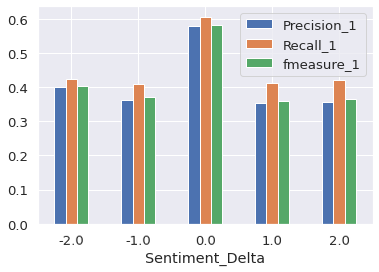

In [ ]:
#Barplot ROUGE1-SD

delta_p1 = nr_df.groupby('Sentiment_Delta')['Precision_1'].mean()
delta_r1 = nr_df.groupby('Sentiment_Delta')['Recall_1'].mean()
delta_f1 = nr_df.groupby('Sentiment_Delta')['fmeasure_1'].mean()

dp1 = pd.DataFrame(delta_p1)
dr1 = pd.DataFrame(delta_r1)
df1 = pd.DataFrame(delta_f1)

m_1 = pd.merge(delta_p1, delta_r1, on="Sentiment_Delta")
m_2 = pd.merge(m_1, delta_f1, on="Sentiment_Delta")

m_2.plot.bar(rot=1)

# delta_d1 = (nr_df.groupby(['Sentiment_Delta'], as_index=False).mean())        
#               .groupby('Sentiment_Delta')['Precision_1'].mean())

# delta_r1 = (nr_df.groupby(['Recall_1'], as_index=False).mean()
#               .groupby('Sentiment_Delta')['Recall_1'].mean())

# delta_f1 = (nr_df.groupby(['fmeasure_1'], as_index=False).mean()
#             .groupby('Sentiment_Delta')['fmeasure_1'].mean())


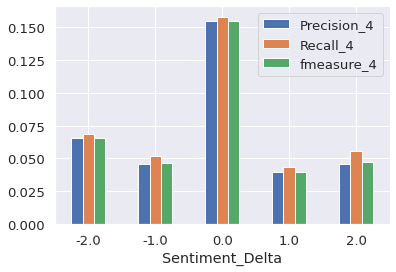

In [ ]:
#Barplot ROUGE4-SD

delta_p4 = nr_df.groupby('Sentiment_Delta')['Precision_4'].mean()
delta_r4 = nr_df.groupby('Sentiment_Delta')['Recall_4'].mean()
delta_f4 = nr_df.groupby('Sentiment_Delta')['fmeasure_4'].mean()

dp4 = pd.DataFrame(delta_p4)
dr4 = pd.DataFrame(delta_r4)
df4 = pd.DataFrame(delta_f4)

m_1_1 = pd.merge(delta_p4, delta_r4, on="Sentiment_Delta")
m_2_1 = pd.merge(m_1_1, delta_f4, on="Sentiment_Delta")

m_2_1.plot.bar(rot=1)

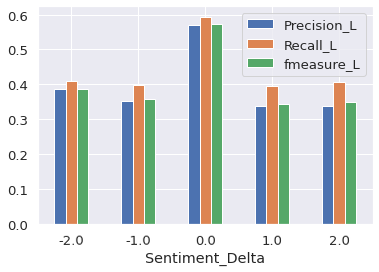

In [ ]:
#Barplot ROUGEL-SD

delta_pL = nr_df.groupby('Sentiment_Delta')['Precision_L'].mean()
delta_rL = nr_df.groupby('Sentiment_Delta')['Recall_L'].mean()
delta_fL = nr_df.groupby('Sentiment_Delta')['fmeasure_L'].mean()

dpL = pd.DataFrame(delta_pL)
drL = pd.DataFrame(delta_rL)
dfL = pd.DataFrame(delta_fL)

m_1_2 = pd.merge(delta_pL, delta_rL, on="Sentiment_Delta")
m_2_2 = pd.merge(m_1_2, delta_fL, on="Sentiment_Delta")

# m_2_2

m_2_2.plot.bar(rot=1)

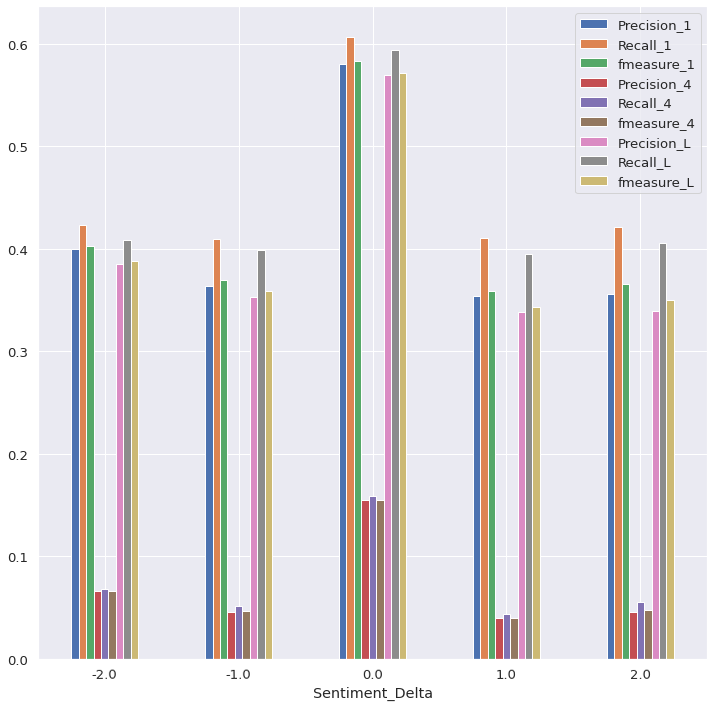

In [ ]:
# m_2.plot.bar(rot=1)
# m_2_1.plot.bar(rot=1)
# m_2_2.plot.bar(rot=1)

m_new = pd.merge(m_2, m_2_1, on="Sentiment_Delta")
m_new2 = pd.merge(m_new, m_2_2, on="Sentiment_Delta")

m_new2.plot.bar(rot=1, figsize = (12,12))

In [ ]:
#Correlation coefficients are very similar across all types of correlation, ~ -0.004

# nr_df['Sentiment_Delta'].corr(nr_df['Exact_String'], method="pearson")
# nr_df['Sentiment_Delta'].corr(nr_df['Exact_String'], method="spearman")
# nr_df['Sentiment_Delta'].corr(nr_df['Exact_String'], method="kendall")

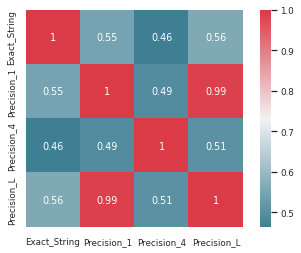

In [ ]:
#What is the best type of correlation to use for the data types? --> mix of floats, strings, and bools
#Does this type of correlation matrix need a heatmap, like for the confusion matrices?

esp = nr_df[['Exact_String','Precision_1', 'Precision_4', 'Precision_L']]

esp_r = esp.corr()

sns.set(font_scale=0.8)
sns.heatmap(esp_r, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True)

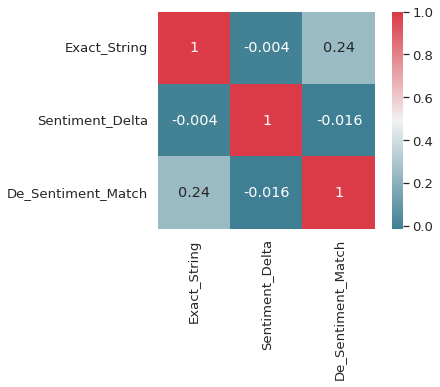

In [ ]:
sdm = nr_df[['Exact_String','Sentiment_Delta', 'De_Sentiment_Match']]

sdm_r = sdm.corr()

sns.set(font_scale=1.2)
sns.heatmap(sdm_r, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True)

In [ ]:
# nr_df.to_csv('evals_w_rouge.tsv', sep="\t")

In [ ]:
# sns.lineplot(data=[delta_p4, delta_f4])

In [ ]:
# nr_df

In [ ]:
# nr_df.to_csv('total.tsv', sep="\t")

In [ ]:
# smaller = nr_df.loc[nr_df['Exact_String'] == False]

# smaller

**Below are the data visualizations (which are very much a WIP), which have been separated from the dataframe creation/analysis for the sake of clarity and organization. They are not part of the new files that were generated in the cells directly above, so nothing is being lost by including the graphs here.**

In [ ]:
#SD-R1 Scatterplot

# plt.scatter(x=, y=, c="r", alpha=0.5)
# plt.title("Recall_1 and Sentiment_Delta")
# plt.xlabel("Sentiment_Delta")
# plt.ylabel("Recall_1")